**Data used is of the example data provided from capstone project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#the column "SEVERITYCODE" is our dependent variable
data_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
#info about the missing samples
data_df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

**To know the number of samples**

In [6]:
data_df.shape

(194673, 38)

**Let's check our dependant variable "Severity Code" for any non-balance**

In [7]:
data_df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

**The number of samples under '1' category is more than two times of the number of samples in '2' category, which might cause issues in clustering as there is no balance**

In [8]:
#we should balance the sample
from sklearn.utils import resample
major_sample = data_df[data_df.SEVERITYCODE==1]
minor_sample = data_df[data_df.SEVERITYCODE==2]
df_resample = resample(major_sample,replace=False,n_samples=len(minor_sample),random_state=42)
data_df_mod = pd.concat([df_resample,minor_sample])

In [9]:
data_df_mod["SEVERITYCODE"].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

**The Sample dependant variable is now balanced**

In [10]:
data_df_mod.shape

(116376, 38)

In [11]:
collisions_df = data_df_mod[["X","Y","LOCATION","SEVERITYCODE"]].dropna(axis=0)

In [12]:
collisions_df.isna().sum()

X               0
Y               0
LOCATION        0
SEVERITYCODE    0
dtype: int64

In [13]:
collisions_df.shape

(113478, 4)

**descriptive statistics of the modified sample**

In [37]:
data_df_mod.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,116376.000000,113478.000000,113478.000000,116376.000000,116376.000000,116376.000000,43748.000000,116376.000000,116376.000000,116376.000000,116376.000000,116376.000000,116376.000000,6.821300e+04,116376.000000,1.163760e+05
mean,1.500000,-122.330467,47.619961,109068.346532,142015.935270,142227.137167,37775.689883,1.500000,2.525426,0.058603,0.044210,1.905633,14.440434,7.986918e+06,421.418858,1.539370e+04
std,0.500002,0.029876,0.056772,62773.637738,86941.020199,87296.688147,52748.133673,0.500002,1.424194,0.246694,0.207352,0.666044,7.408880,2.560177e+06,4190.984330,9.027528e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.137016e+06,0.000000,0.000000e+00
25%,1.000000,-122.348589,47.575576,54698.750000,70884.500000,70884.500000,28665.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.041035e+06,0.000000,0.000000e+00
50%,1.500000,-122.330276,47.615450,107939.000000,124506.500000,124506.500000,29988.000000,1.500000,2.000000,0.000000,0.000000,2.000000,14.000000,8.028032e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.664884,163214.500000,204774.000000,204914.000000,34025.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.016102e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219546.000000,331453.000000,332953.000000,725404.000000,2.000000,81.000000,6.000000,2.000000,11.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [14]:
pip install folium

In [ ]:
import folium

In [ ]:
# define the world map
world_map = folium.Map()

In [15]:
collisions_df["X"] = collisions_df["X"].astype(float)
collisions_df["Y"] = collisions_df["Y"].astype(float)
code1 = collisions_df[collisions_df["SEVERITYCODE"]==1]
code2 = collisions_df[collisions_df["SEVERITYCODE"]==2]

In [16]:
import matplotlib.patches as mpatches

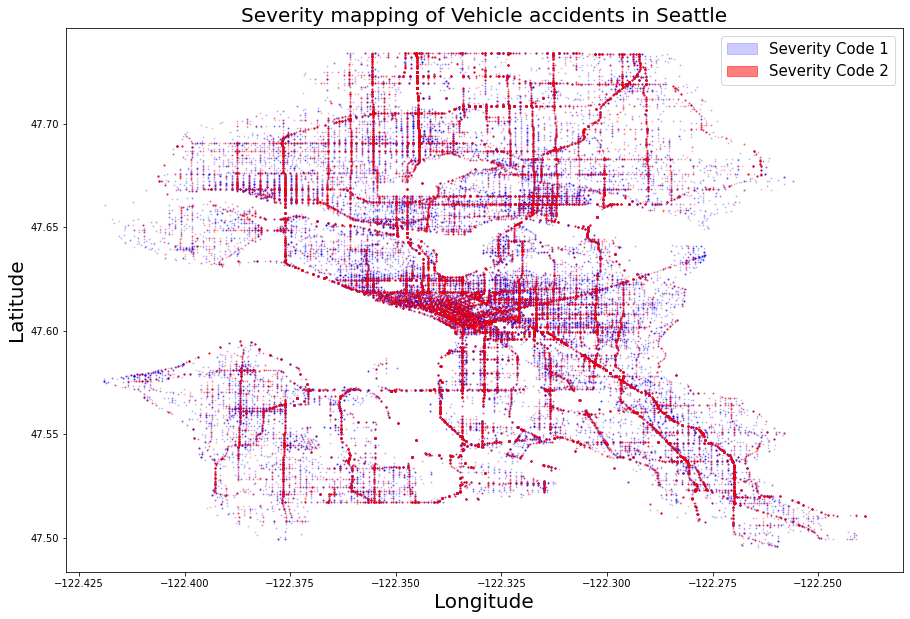

In [17]:
plt.figure(figsize=(15,10))

#creating scatterplots
plt.scatter(code1.X, code1.Y, alpha=0.2, s=1, color='blue')
plt.scatter(code2.X, code2.Y, alpha=0.2, s=1, color='red')


#creating legend
blue_patch = mpatches.Patch( label='Severity Code 1', alpha=0.2, color='blue')
red_patch = mpatches.Patch(color='red', label='Severity Code 2', alpha=0.5)
plt.legend([blue_patch, red_patch],('Severity Code 1', 'Severity Code 2'),loc='upper right', prop={'size':15})

#adjust more settings
plt.title('Severity mapping of Vehicle accidents in Seattle', size=20)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

Top streets with most number of accidents

In [18]:
factor = collisions_df.groupby('LOCATION',sort=False).count()
factor.rename(columns={"SEVERITYCODE":"COUNT"},inplace=True)
factor = factor["COUNT"].sort_values(ascending=False)
factor.head()

LOCATION
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST              176
6TH AVE AND JAMES ST                                        174
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N    163
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST              158
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST       149
Name: COUNT, dtype: int64

Text(0.5, 0, 'Count')

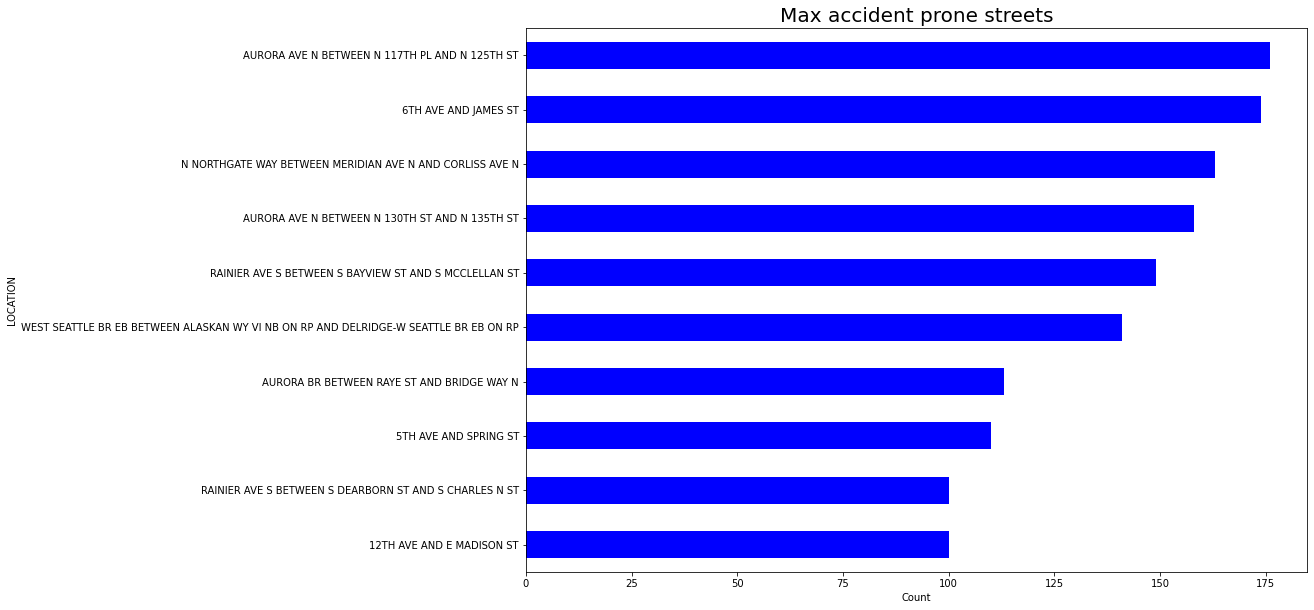

In [19]:
factor[0:10].sort_values().plot(kind='barh', legend=False, color='blue', figsize=(14,10))
plt.title('Max accident prone streets', size=20)
plt.xlabel('Count')

**Type of accidents based on driver's influence on drugs**

In [20]:
influence = data_df_mod[["UNDERINFL","SEVERITYCODE"]].dropna(axis=0)

In [21]:
influence.UNDERINFL.value_counts()

N    60514
0    47263
Y     3310
1     2611
Name: UNDERINFL, dtype: int64

In [22]:
influence_p = influence[(influence["UNDERINFL"]=="1") | (influence["UNDERINFL"]=="Y")]

In [23]:
influence_p["UNDERINFL"].value_counts()

Y    3310
1    2611
Name: UNDERINFL, dtype: int64

In [24]:
influence_n = influence[(influence["UNDERINFL"]=="0") | (influence["UNDERINFL"]=="N")]

In [25]:
influence_p["SEVERITYCODE"].value_counts()

2    3562
1    2359
Name: SEVERITYCODE, dtype: int64

**Visaulizing the data to know severity of accident based on the driver's influence under drugs**

In [26]:
influence_p['SEVERITYCODE'].value_counts()

2    3562
1    2359
Name: SEVERITYCODE, dtype: int64

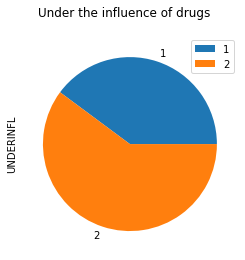

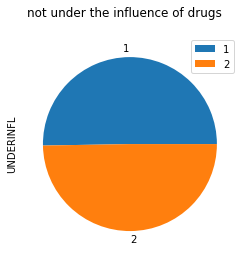

In [27]:
influence_p.groupby(['SEVERITYCODE']).count().plot(kind="pie",subplots=True,title="Under the influence of drugs")
influence_n.groupby(['SEVERITYCODE']).count().plot(kind="pie",subplots=True,title="not under the influence of drugs")
plt.legend(influence_n['SEVERITYCODE'].unique())
plt.show()

**Relation between accidents and weather type conditions**

In [28]:
weather_light_cond = data_df_mod[["SEVERITYCODE","WEATHER","LIGHTCOND"]].dropna(axis=0)
weather_group_1 = weather_light_cond[weather_light_cond["SEVERITYCODE"]==1]
weather_group_2 = weather_light_cond[weather_light_cond["SEVERITYCODE"]==2]

In [29]:
weather_code1 = weather_group_1.groupby("WEATHER",sort=False).count()
weather_code1 = weather_code1["SEVERITYCODE"].sort_values(ascending=False)
weather_code1.head()

WEATHER
Clear       32074
Raining      9317
Overcast     8067
Unknown      6115
Snowing       308
Name: SEVERITYCODE, dtype: int64

In [30]:
light_code1 = weather_group_1.groupby("LIGHTCOND",sort=False).count()
light_code1 = light_code1["SEVERITYCODE"].sort_values(ascending=False)
light_code1.head()

LIGHTCOND
Daylight                   33005
Dark - Street Lights On    14507
Unknown                     5528
Dusk                        1723
Dawn                         697
Name: SEVERITYCODE, dtype: int64

In [31]:
weather_code2 = weather_group_2.groupby("WEATHER",sort=False).count()
weather_code2 = weather_code2["SEVERITYCODE"].sort_values(ascending=False)
weather_code2

WEATHER
Clear                       35815
Raining                     11170
Overcast                     8741
Unknown                       812
Fog/Smog/Smoke                187
Snowing                       169
Other                         116
Sleet/Hail/Freezing Rain       28
Blowing Sand/Dirt              15
Severe Crosswind                7
Partly Cloudy                   3
Name: SEVERITYCODE, dtype: int64

In [32]:
light_code2 = weather_group_2.groupby("LIGHTCOND",sort=False).count()
light_code2 = light_code2["SEVERITYCODE"].sort_values(ascending=False)
light_code2.head()

LIGHTCOND
Daylight                   38533
Dark - Street Lights On    14456
Dusk                        1939
Dawn                         824
Unknown                      605
Name: SEVERITYCODE, dtype: int64

In [33]:
weather_count =pd.merge(weather_code1,weather_code2,on="WEATHER")
weather_count.rename(columns={"SEVERITYCODE_x":"SEVERITYCODE_1","SEVERITYCODE_y":"SEVERITYCODE_2"},inplace=True)
weather_count

,SEVERITYCODE_1,SEVERITYCODE_2
WEATHER,,
Clear,32074,35815
Raining,9317,11170
Overcast,8067,8741
Unknown,6115,812
Snowing,308,169
Other,301,116
Fog/Smog/Smoke,161,187
Sleet/Hail/Freezing Rain,40,28
Blowing Sand/Dirt,17,15


In [34]:
light_count =pd.merge(light_code1,light_code2,on="LIGHTCOND")
light_count.rename(columns={"SEVERITYCODE_x":"SEVERITYCODE_1","SEVERITYCODE_y":"SEVERITYCODE_2"},inplace=True)
light_count

,SEVERITYCODE_1,SEVERITYCODE_2
LIGHTCOND,,
Daylight,33005,38533
Dark - Street Lights On,14507,14456
Unknown,5528,605
Dusk,1723,1939
Dawn,697,824
Dark - No Street Lights,493,334
Dark - Street Lights Off,385,316
Other,70,52
Dark - Unknown Lighting,4,4


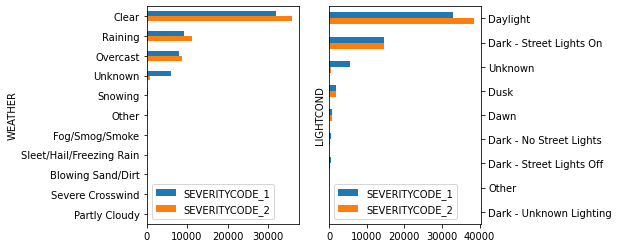

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
weather_count.plot.barh(ax=ax1)
light_count.plot.barh(ax=ax2)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax2.yaxis.tick_right()

"Clear" weather conditions and "Daylight" light conditions resulted in more number of type 1 and type 2 severeity accidents, infers that accidents took place in safest of conditions possible

**The data is composed of 38 features that accurately describe each car accident that happened in Seattle from 2014 to 2020. They are classified in terms of severity, type of weather and road condition, location, address type, and many more**

However, all the features are not of importance to us

For example, SDOTCOLNUM, X, Y, LOCATION, INCDTTM, INCDATE, REPORTNO, COLDETKEY, INCKEY and OBJECTID are features that give descriptive and detailed information about an accident, and are then not relevant to predict the severity of an accident in general.
Moreover, EXCEPTRSNCODE, EXCEPTRSNDESC, PEDROWNOTGRNT, SPEEDING, INATTENTIONIND and INTKEY have a high number of missing data that would skew and bias our predictive model.

Selecting **ROADCOND, LIGHTCOND , WEATHER, UNDERINFL, ADDRTYPE** as dependent variables 

In [38]:
data_df_mod.isna().sum()

SEVERITYCODE           0
X                   2898
Y                   2898
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE             931
INTKEY             72628
LOCATION            1288
EXCEPTRSNCODE      64676
EXCEPTRSNDESC     113653
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       2691
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        2937
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND     97715
UNDERINFL           2678
WEATHER             2790
ROADCOND            2744
LIGHTCOND           2831
PEDROWNOTGRNT     111975
SDOTCOLNUM         48163
SPEEDING          110377
ST_COLCODE            13
ST_COLDESC          2691
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

**PREPROCESSING OF DATA**

In [63]:
data_refined = data_df_mod[["SEVERITYCODE","ROADCOND","UNDERINFL","LIGHTCOND","WEATHER","ADDRTYPE"]]

In [64]:
data_refined.reset_index(drop=True,inplace=True)

In [65]:
data_refined_na=data_refined.dropna(axis=0)

In [66]:
data_refined.shape

(116376, 6)

In [67]:
data_refined_na.shape

(112581, 6)

In [68]:
data_refined_na["SEVERITYCODE"].value_counts()
#looks almost balanced, no need of resampling it again

2    56883
1    55698
Name: SEVERITYCODE, dtype: int64

In [69]:
data_refined_na.isna().sum()

SEVERITYCODE    0
ROADCOND        0
UNDERINFL       0
LIGHTCOND       0
WEATHER         0
ADDRTYPE        0
dtype: int64

In [70]:
data_refined_na.WEATHER.value_counts()

Clear                       67601
Raining                     20409
Overcast                    16737
Unknown                      6499
Snowing                       473
Other                         402
Fog/Smog/Smoke                344
Sleet/Hail/Freezing Rain       67
Blowing Sand/Dirt              27
Severe Crosswind               17
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [71]:
data_refined_na.ROADCOND.value_counts()

Dry               75713
Wet               29013
Unknown            6443
Ice                 667
Snow/Slush          523
Other                77
Standing Water       66
Sand/Mud/Dirt        43
Oil                  36
Name: ROADCOND, dtype: int64

In [72]:
data_refined_na.LIGHTCOND.value_counts()

Daylight                    71180
Dark - Street Lights On     28852
Unknown                      5753
Dusk                         3638
Dawn                         1515
Dark - No Street Lights       822
Dark - Street Lights Off      695
Other                         118
Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

In [75]:
data_refined_na.ADDRTYPE.value_counts()

Block           69440
Intersection    42788
Alley             353
Name: ADDRTYPE, dtype: int64

In [76]:
data_refined_na.UNDERINFL.value_counts()

N    59773
0    46916
Y     3283
1     2609
Name: UNDERINFL, dtype: int64

UNDERINFL needs to be changed to binary values

In [79]:
data_refined_na.UNDERINFL.replace(["0","1"],["N","Y"],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [80]:
data_refined_na.UNDERINFL.value_counts()

N    106689
Y      5892
Name: UNDERINFL, dtype: int64

In [84]:
data_refined_na = data_refined_na.astype({"WEATHER":'category', "ROADCOND":'category', "LIGHTCOND":'category',"UNDERINFL":'category',"ADDRTYPE":'category'})
data_refined_na.head()

,SEVERITYCODE,ROADCOND,UNDERINFL,LIGHTCOND,WEATHER,ADDRTYPE
0,1,Dry,N,Unknown,Clear,Block
1,1,Wet,N,Dark - Street Lights On,Raining,Intersection
2,1,Wet,N,Daylight,Raining,Intersection
3,1,Wet,N,Dark - Street Lights On,Raining,Block
4,1,Dry,N,Daylight,Clear,Block


### **LABEL ENCODING**

In [86]:
data_refined_na["WEATHER_c"] = data_refined_na["WEATHER"].cat.codes
data_refined_na["ROADCOND_c"] = data_refined_na["ROADCOND"].cat.codes
data_refined_na["LIGHTCOND_c"] = data_refined_na["LIGHTCOND"].cat.codes
data_refined_na["UNDERINFL_c"] = data_refined_na["UNDERINFL"].cat.codes
data_refined_na["ADDRTYPE_c"] = data_refined_na["ADDRTYPE"].cat.codes
Feature = data_refined_na[['WEATHER','ROADCOND','LIGHTCOND',"UNDERINFL","ADDRTYPE",'WEATHER_c','ROADCOND_c','LIGHTCOND_c',"UNDERINFL_c","ADDRTYPE_c"]]
X = np.asarray(Feature[['WEATHER_c','ROADCOND_c','LIGHTCOND_c','UNDERINFL_c','ADDRTYPE_c']])
X[0:]

array([[1, 0, 8, 0, 1],
       [6, 8, 2, 0, 2],
       [6, 8, 5, 0, 2],
       ...,
       [1, 0, 5, 0, 1],
       [1, 0, 5, 0, 2],
       [1, 0, 6, 0, 2]], dtype=int8)

In [95]:
pd.DataFrame({'ROADCOND':pd.Series(data_refined_na.ROADCOND.cat.categories),'LIGHTCOND':pd.Series(data_refined_na.LIGHTCOND.cat.categories),'LIGHTCOND':pd.Series(data_refined_na.LIGHTCOND.cat.categories),'WEATHER':pd.Series(data_refined_na.WEATHER.cat.categories),'UNDERINFL':pd.Series(data_refined_na.UNDERINFL.cat.categories),'ADDRTYPE':pd.Series(data_refined_na.ADDRTYPE.cat.categories)})

,ROADCOND,LIGHTCOND,WEATHER,UNDERINFL,ADDRTYPE
0,Dry,Dark - No Street Lights,Blowing Sand/Dirt,N,Alley
1,Ice,Dark - Street Lights Off,Clear,Y,Block
2,Oil,Dark - Street Lights On,Fog/Smog/Smoke,NaN,Intersection
3,Other,Dark - Unknown Lighting,Other,NaN,NaN
4,Sand/Mud/Dirt,Dawn,Overcast,NaN,NaN
5,Snow/Slush,Daylight,Partly Cloudy,NaN,NaN
6,Standing Water,Dusk,Raining,NaN,NaN
7,Unknown,Other,Severe Crosswind,NaN,NaN
8,Wet,Unknown,Sleet/Hail/Freezing Rain,NaN,NaN
9,NaN,NaN,Snowing,NaN,NaN


In [97]:
y = data_refined_na['SEVERITYCODE'].values
y[0:]

array([1, 1, 1, ..., 2, 2, 2])

## **MODELLING**

In [100]:
#NORMALIZE THE DATA
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X.astype(float))
X[0:]

array([[-0.71690886, -0.68765064,  2.23833541, -0.23500199, -0.76760617],
       [ 1.14928602,  1.51357048, -1.4351631 , -0.23500199,  1.2688701 ],
       [ 1.14928602,  1.51357048,  0.40158615, -0.23500199,  1.2688701 ],
       ...,
       [-0.71690886, -0.68765064,  0.40158615, -0.23500199, -0.76760617],
       [-0.71690886, -0.68765064,  0.40158615, -0.23500199,  1.2688701 ],
       [-0.71690886, -0.68765064,  1.0138359 , -0.23500199,  1.2688701 ]])

In [99]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [108]:
x_train.shape, x_test.shape

((90064, 5), (22517, 5))

**BUILDING MODELS**



**KNN**

In [105]:
#Classification K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

In [116]:
KNN = KNeighborsClassifier(n_neighbors=47)
classifier = KNN.fit(x_train,y_train)

In [117]:
y_predict = classifier.predict(x_test)

In [118]:
y_predict[:10]

array([1, 1, 2, 1, 2, 1, 2, 2, 1, 2])

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss
print("train accuracy" , accuracy_score(y_train,classifier.predict(x_train)))
print("test accuracy" , accuracy_score(y_test,y_predict))
print("F1-Score of KNN is : ", f1_score(y_test, y_predict, average='macro'))
print("Jaccard Score of KNN is : ", jaccard_similarity_score(y_test, y_predict))

train accuracy 0.6048698703144431
test accuracy 0.6065195185859573
F1-Score of KNN is :  0.6065092547631128
Jaccard Score of KNN is :  0.6065195185859573


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [130]:
#choosing the right K
maxK=100
accuracy=[]
for n in range(1,maxK):
   classifier1 = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
   accuracy.append(accuracy_score(y_test, classifier1.predict(x_test)))
accuracy=np.array(accuracy)

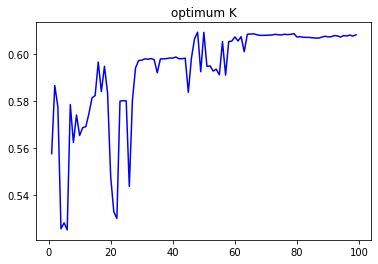

In [131]:
plt.plot(range(1,maxK),accuracy,color="b")
plt.title("optimum K")
plt.show()

**K in the range of 47-50 has given optimum results**

In [120]:
#choosing the right K
maxK=60
accuracy=[]
for n in range(55,maxK):
   classifier1 = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
   accuracy.append(accuracy_score(y_test, classifier1.predict(x_test)))
accuracy=np.array(accuracy)

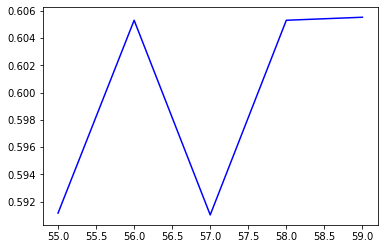

In [121]:
plt.plot(range(55,maxK),accuracy,color="b")
plt.show()

### **Decision Tree**

In [124]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt.fit(x_train, y_train)
y_dt_predict = dt.predict(x_test)
y_dt_predict[0:10]

array([1, 1, 2, 1, 2, 1, 1, 2, 1, 1])

In [125]:
print("F1-Score of Decision Tree is : ", f1_score(y_test, y_dt_predict, average='macro'))
print("Jaccard Score of Decision Tree is : ", jaccard_similarity_score(y_test, y_dt_predict))

F1-Score of Decision Tree is :  0.6059143674468024
Jaccard Score of Decision Tree is :  0.609095350179864


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## **Logistic Regression**

In [149]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.1, solver='liblinear').fit(x_train, y_train)
LRpred = LR.predict(x_test)
LRprob = LR.predict_proba(x_test)
LRpred[0:],LRprob[0:]

(array([1, 1, 2, ..., 1, 1, 1]), array([[0.55084798, 0.44915202],
        [0.55084798, 0.44915202],
        [0.40793574, 0.59206426],
        ...,
        [0.55084798, 0.44915202],
        [0.55084798, 0.44915202],
        [0.6466858 , 0.3533142 ]]))

In [150]:
print("F1-Score of Logistic Regression is : ", f1_score(y_test, LRpred, average='macro'))
print("Jaccard Score of Logistic Regression is : ", jaccard_similarity_score(y_test, LRpred))
print("LogLoss of Logistic Regression is : ", log_loss(y_test, LRprob))

F1-Score of Logistic Regression is :  0.6034777922263442
Jaccard Score of Logistic Regression is :  0.6061198205800062
LogLoss of Logistic Regression is :  0.6609706753961718


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [151]:
from sklearn.metrics import confusion_matrix,classification_report

In [152]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7743 3457]
 [5412 5905]]


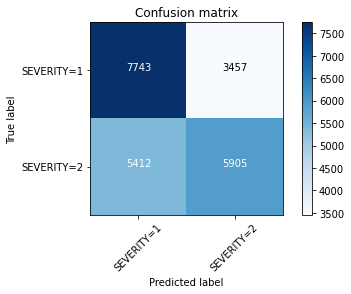

In [153]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LRpred, labels=[1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITY=1','SEVERITY=2'],normalize= False,  title='Confusion matrix')

In [155]:
print(confusion_matrix(y_test, y_predict, labels=[1,2]))
print(classification_report(y_test, y_predict))

[[6771 4429]
 [4431 6886]]
              precision    recall  f1-score   support

           1       0.60      0.60      0.60     11200
           2       0.61      0.61      0.61     11317

    accuracy                           0.61     22517
   macro avg       0.61      0.61      0.61     22517
weighted avg       0.61      0.61      0.61     22517

